In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
homeownership_rate_df = pd.read_csv(r"https://raw.githubusercontent.com/DaveWaMu/Housing-Dashboard/main/resources/homeownership_rate_RSAHORUSQ156S.csv")
monthly_house_supply_df = pd.read_csv(r"https://raw.githubusercontent.com/DaveWaMu/Housing-Dashboard/main/resources/monthly_supply_houses_us_MSACSR.csv")
median_sales_price_df = pd.read_csv(r"https://raw.githubusercontent.com/DaveWaMu/Housing-Dashboard/main/resources/median_sales_price_MSPUS.csv")
construction_permit_df = pd.read_csv(r"https://raw.githubusercontent.com/DaveWaMu/Housing-Dashboard/main/etl/construction_permit.csv")
homeownership_rate_df = homeownership_rate_df.rename(columns={"RSAHORUSQ156S":"homeownership_rate","DATE":"date"})
monthly_house_supply_df = monthly_house_supply_df.rename(columns={"MSACSR":"ratio_for_sale_to_sold","DATE":"date"})
median_sales_price_df = median_sales_price_df.rename(columns={"MSPUS":"median_sales_price","DATE":"date"})
construction_permit_df = construction_permit_df.drop(labels="units_not_started_thousands", axis=1, inplace=False)


In [3]:
# Univariate Linear Regression for Time-Series Data with Machine Learning

def UnivariateLinearRegression(df):

    from sklearn.linear_model import LinearRegression

    last = len(df.iloc[:,1])
    
    list = df.iloc[:,1].astype("float").to_list()
    x_list = [0]
    for x in list:
        x_list.append(x)

    y_list = df.iloc[:,1].astype("float").to_list()
    y_list.append(0)

    data = {"x" : x_list, "y" : y_list}

    ml_df = pd.DataFrame(data)
    ml_df = ml_df.drop(0, inplace=False).drop(last, inplace=False)

    # Assign the data to X and y
    # Note: Sklearn requires a two-dimensional array of values, so we use reshape to create this
    X = ml_df.x.values.reshape(-1, 1)
    y = ml_df.y.values.reshape(-1, 1)
    print("Shape: ", X.shape, y.shape)

    # Fit the model to the data. 
    # Note: This is the training step where you fit the line to the data.
    model = LinearRegression()
    model.fit(X, y)

    # Print the coefficient and the intercept for the model
    print('Weight coefficients: ', model.coef_)
    print('Y-Axis Intercept: ', model.intercept_)

    # X value min & max
    # Note: we have to transform our min and max values, so they are in the format: array([[ 1.17]])
    # This is the required format for `model.predict()`
    x_min = np.array([[X.min()]])
    x_max = np.array([[X.max()]])
    print(f"Min X Value: {x_min}")
    print(f"Max X Value: {x_max}")

    # Y value predicted min & max
    # Calculate the y_min and y_max using model.predict and x_min and x_max
    y_min = model.predict(x_min)
    y_max = model.predict(x_max)

    print("---------------------")
    print("PREDICTIONS")
    print("---------------------")
    print(f"Predicted Min y Value: {y_min}")
    print(f"Predicted Max y Value: {y_max}")

    # Predictions
    predictions = model.predict(X)
    prediction_error = predictions - y
    predicted_output = predictions
    actual_output = y
    max_error = max(prediction_error)
    min_error = min(prediction_error)

    print("---------------------")
    print(f"Actual Output: {y[0]}")
    print(f"Predicted Output: {predictions[0]}")
    print(f"Prediction Error: {predictions[0]-y[0]}")
    print("---------------------")
    print(f"Max Prediction Error: {max_error}")
    print(f"Min Prediction Error: {min_error}")
    print("---------------------")

    # Fit line
    # Plot X and y using plt.scatter
    # Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
    plt.scatter(X, y, c='blue')
    plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
    plt.title('Model Fit Line')
    plt.show

    #Build predicted values dataframe
    predicted_df = df.drop(axis = 0, index = 0, inplace = False)
    predicted_df["predicted"] = predicted_output
    predicted_df["error"] = prediction_error

    print("Predicted Data Frame")
    print(predicted_df.head(5))
    print(predicted_df.tail(5))

    return predicted_df

Shape:  (125, 1) (125, 1)
Weight coefficients:  [[1.00901548]]
Y-Axis Intercept:  [75.26188919]
Min X Value: [[117000.]]
Max X Value: [[369800.]]
---------------------
PREDICTIONS
---------------------
Predicted Min y Value: [[118130.0727809]]
Predicted Max y Value: [[373209.18554521]]
---------------------
Actual Output: [126800.]
Predicted Output: [125092.27957708]
Prediction Error: [-1707.72042292]
---------------------
Max Prediction Error: [19266.59739235]
Min Prediction Error: [-18082.01438472]
---------------------
Predicted Data Frame
         date  median_sales_price      predicted         error
1  1990-04-01            126800.0  125092.279577  -1707.720423
2  1990-07-01            117000.0  128018.424462  11018.424462
3  1990-10-01            121500.0  118130.072781  -3369.927219
4  1991-01-01            120000.0  122670.642431   2670.642431
5  1991-04-01            119900.0  121157.119214   1257.119214
           date  median_sales_price      predicted         error
121  202

,date,median_sales_price,predicted,error
1,1990-04-01,126800.0,125092.279577,-1707.720423
2,1990-07-01,117000.0,128018.424462,11018.424462
3,1990-10-01,121500.0,118130.072781,-3369.927219
4,1991-01-01,120000.0,122670.642431,2670.642431
5,1991-04-01,119900.0,121157.119214,1257.119214
...,...,...,...,...
121,2020-04-01,322600.0,332041.354055,9441.354055
122,2020-07-01,337500.0,325583.654997,-11916.345003
123,2020-10-01,358700.0,340617.985615,-18082.014385
124,2021-01-01,369800.0,362009.113743,-7790.886257


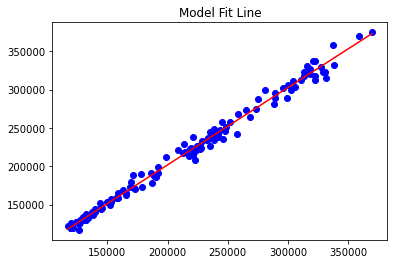

In [4]:
median_sales_price_df = UnivariateLinearRegression(median_sales_price_df)
median_sales_price_df.head(5)

In [5]:
# Multivariate Linear Regression for Time-Series Data with Machine Learning

def MultivariateLinearRegression(df, target_column):

    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression

    df["y_actual_output"] = target_column
    df = df.set_index("date")

    data = {}

    last_col = len(df.iloc[0,:])
    print(f"Number of Columns: {last_col}")

    for i in range(0, (last_col - 1)):
        list = df.iloc[:, i].astype("float").to_list()
        x_list = [0]
        for x in list:
            x_list.append(x)
        data[f'X{i+1}'] = f'X{i+1}'
        data[f'X{i+1}'] = x_list

    y_list = df.iloc[:, last_col - 1].astype("float").to_list()
    y_list.append(0)
    data['Y'] = y_list

    ml_df = pd.DataFrame(data)

    last_row = len(ml_df.iloc[:,1])
    last = len(ml_df.iloc[0,:])
    ml_df = ml_df.drop(0, inplace=False).drop(last_row - 1, inplace=False)
    print("Machine Learning Data Set")
    print(ml_df.head(5))
    print(ml_df.tail(5))

    # Assign the data to X and y
    X = ml_df.iloc[:,0:last-1]
    y = ml_df["Y"].values.reshape(-1, 1)
    print("Shape: ", X.shape, y.shape)

    # Use train_test_split to create training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Create the model using LinearRegression
    model = LinearRegression()

    # Fitting our model with all of our features in X
    model.fit(X, y)
    score = model.score(X, y)
    print(f"R2 Score: {score}")

    # Fit the model to the training data and calculate the scores for the training and testing data
    model.fit(X_train, y_train)
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    print(f"Training Score: {training_score}")
    print(f"Testing Score: {testing_score}")

    # Print the coefficient and the intercept for the model
    print('Weight coefficients: ', model.coef_)
    print('Y-Axis Intercept: ', model.intercept_)

    # X value min & max
    # Note: we have to transform our min and max values, so they are in the format: array([[ 1.17]])
    # This is the required format for `model.predict()`
    x_min = np.array([[X.min()]])
    x_max = np.array([[X.max()]])
    print(f"Min X Value: {x_min}")
    print(f"Max X Value: {x_max}")

    # Y value predicted min & max
    # Calculate the y_min and y_max using model.predict and x_min and x_max
    # y_min = model.predict(x_min)
    # y_max = model.predict(x_max)

    # print("---------------------")
    # print("PREDICTIONS")
    # print("---------------------")
    # print(f"Predicted Min y Value: {y_min}")
    # print(f"Predicted Max y Value: {y_max}")

    # Predictions
    predictions = model.predict(X)
    prediction_error = predictions - y
    predicted_output = predictions
    actual_output = y
    max_error = max(prediction_error)
    min_error = min(prediction_error)

    # print("---------------------")
    print(f"Actual Output: {y[0]}")
    print(f"Predicted Output: {predictions[0]}")
    print(f"Prediction Error: {predictions[0]-y[0]}")
    # print("---------------------")
    print(f"Max Prediction Error: {max_error}")
    print(f"Min Prediction Error: {min_error}")
    # print("---------------------")

    # Plot the Residuals for the Training and Testing data
    plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
    plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
    plt.legend()
    plt.hlines(y=0, xmin=y.min(), xmax=y.max())
    plt.title("Residual Plot")

    #Build predicted values dataframe
    df = df.reset_index()
    predicted_df = df.drop(axis = 0, index = 0, inplace = False)
    predicted_df["predicted"] = predicted_output
    predicted_df["error"] = prediction_error

    # print("Predicted Data Frame")
    # print(predicted_df.head(5))
    # print(predicted_df.tail(5))

    return predicted_df

Number of Columns: 5
Machine Learning Data Set
       X1      X2     X3      X4       Y
1  1246.0  1289.0  885.0  1345.0  1108.0
2  1108.0  1177.0  846.0  1263.0   976.0
3   976.0  1110.0  793.0  1312.0   861.0
4   861.0   969.0  745.0  1173.0   911.0
5   911.0   921.0  678.0  1176.0   964.0
         X1      X2      X3      X4       Y
121  1382.0  1277.0  1215.0  1267.0  1296.0
122  1296.0  1273.0  1187.0  1243.0  1589.0
123  1589.0  1448.0  1218.0  1426.0  1758.0
124  1758.0  1661.0  1264.0  1386.0  1755.0
125  1755.0  1725.0  1307.0  1497.0  1594.0
Shape:  (125, 4) (125, 1)
R2 Score: 0.937805803671687
Training Score: 0.9429705036450655
Testing Score: 0.9132028485970194
Weight coefficients:  [[ 0.88342477  0.28579528  0.01040637 -0.22687732]]
Y-Axis Intercept:  [68.97825271]
Min X Value: [[[513. 505. 416. 565.]]]
Max X Value: [[[2263. 2151. 1423. 2245.]]]
Actual Output: [1108.]
Predicted Output: [1242.17527855]
Prediction Error: [134.17527855]
Max Prediction Error: [364.41365899]
Min 

,date,new_permits_thousands,units_started_thousands,units_under_construction_thousands,units_constructed_thousands,y_actual_output,predicted,error
1,1990-04-01,1108.0,1177.0,846.0,1263.0,1108.0,1242.175279,134.175279
2,1990-07-01,976.0,1110.0,793.0,1312.0,976.0,1106.451680,130.451680
3,1990-10-01,861.0,969.0,745.0,1173.0,861.0,959.022800,98.022800
4,1991-01-01,911.0,921.0,678.0,1176.0,911.0,848.168259,-62.831741
5,1991-04-01,964.0,1036.0,654.0,1093.0,964.0,877.243465,-86.756535
...,...,...,...,...,...,...,...,...
121,2020-04-01,1296.0,1273.0,1187.0,1243.0,1296.0,1380.022036,84.022036
122,2020-07-01,1589.0,1448.0,1218.0,1426.0,1589.0,1308.058002,-280.941998
123,2020-10-01,1758.0,1661.0,1264.0,1386.0,1758.0,1575.719683,-182.280317
124,2021-01-01,1755.0,1725.0,1307.0,1497.0,1755.0,1795.446650,40.446650


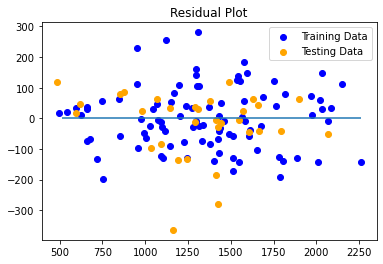

In [6]:
construction_permit_df = MultivariateLinearRegression(construction_permit_df, construction_permit_df['new_permits_thousands'])
construction_permit_df.head(5)